In [20]:
# 1. Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [21]:
# 2. Generar datos más realistas y variados
def generar_datos(n=100):
    np.random.seed(42)
    datos, etiquetas = [], []

    for _ in range(n):
        vector = np.random.binomial(1, 0.6, 10)
        vector[3:] = 0  # TEA
        datos.append(vector)
        etiquetas.append("TEA")

    for _ in range(n):
        vector = np.random.binomial(1, 0.6, 10)
        vector[:3] = 0
        vector[6:] = 0  # TDAH
        datos.append(vector)
        etiquetas.append("TDAH")

    for _ in range(n):
        vector = np.random.binomial(1, 0.6, 10)
        vector[:6] = 0
        vector[9] = 0  # Discapacidad
        datos.append(vector)
        etiquetas.append("Discapacidad Intelectual")

    for _ in range(n):
        vector = np.random.binomial(1, 0.6, 10)
        vector[:9] = 0  # Ansiedad
        datos.append(vector)
        etiquetas.append("Ansiedad/Depresión")

    return np.array(datos), np.array(etiquetas)


In [22]:
# 3. Preparación
X, y = generar_datos(100)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [23]:
# 4. Entrenamiento con RandomForest
modelo = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

📊 Precisión general (accuracy): 95.00%
🎯 Precisión por clase: [0.82352941 1.         1.         1.        ]
📢 Recall por clase: [1.         0.93333333 0.88       0.97297297]
🔁 F1-score por clase: [0.90322581 0.96551724 0.93617021 0.98630137]

📋 Validación cruzada (accuracy): [0.9    0.8    0.9875 0.925  0.9125]
✅ Promedio cross-validation: 0.9049999999999999


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


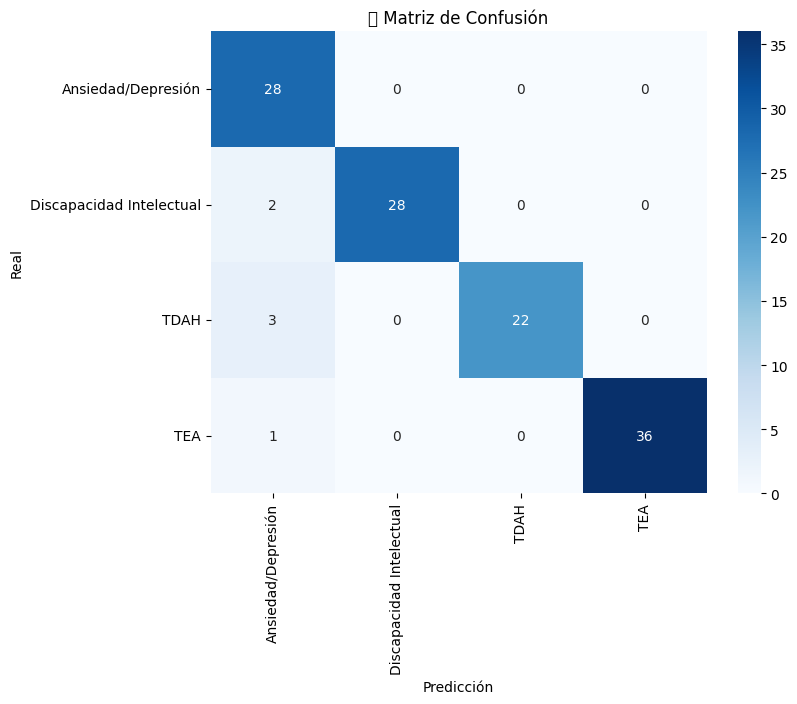

In [24]:
# 5. Evaluación del modelo
accuracy = modelo.score(X_test, y_test)
print(f"📊 Precisión general (accuracy): {accuracy * 100:.2f}%")

y_pred = modelo.predict(X_test)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("🎯 Precisión por clase:", precision)
print("📢 Recall por clase:", recall)
print("🔁 F1-score por clase:", f1)

# Validación cruzada
scores = cross_val_score(modelo, X, y_encoded, cv=5)
print("\n📋 Validación cruzada (accuracy):", scores)
print("✅ Promedio cross-validation:", np.mean(scores))

# 6. Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("🔍 Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


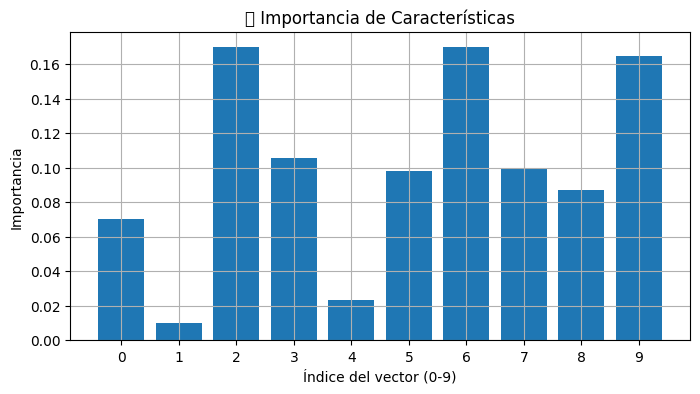

In [25]:
# 7. Importancia de características
importances = modelo.feature_importances_
plt.figure(figsize=(8, 4))
plt.bar(range(len(importances)), importances)
plt.title("📌 Importancia de Características")
plt.xlabel("Índice del vector (0-9)")
plt.ylabel("Importancia")
plt.xticks(range(10))
plt.grid(True)
plt.show()


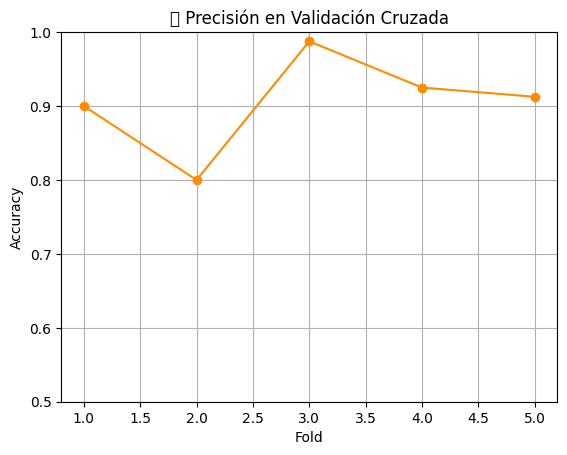

In [27]:
# 8. Validación cruzada visual
plt.plot(range(1, 6), scores, marker='o', color='darkorange')
plt.title("📈 Precisión en Validación Cruzada")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)
plt.grid(True)
plt.show()

In [28]:
# 9. Guardar el modelo
with open("modelo_neurokid.pkl", "wb") as f:
    pickle.dump(modelo, f)
print("✅ Modelo guardado como modelo_neurokid.pkl")

✅ Modelo guardado como modelo_neurokid.pkl


In [29]:
# 10. Exportar predicciones para comparación
import pandas as pd

y_probs = modelo.predict_proba(X_test)
y_preds = modelo.predict(X_test)

df_colab = pd.DataFrame({
    "Real": le.inverse_transform(y_test),
    "Predicho": le.inverse_transform(y_preds),
    "Probabilidad": y_probs.max(axis=1)
})

df_colab.to_csv("resultados_colab.csv", index=False)
print("📁 Exportado como resultados_colab.csv")

📁 Exportado como resultados_colab.csv
